In [13]:
# Read in json with all laureates from our public API

import requests
 
url = "https://api.nobelprize.org/2.0/laureates?limit=1000"

response = requests.get(url)
#print(response.text[:4000])

json = response.json()


In [14]:
# Print the names of all laureates who are persons (have a knownName)

for laureate in json['laureates']:
    if 'knownName' in laureate:
        print ( laureate['knownName']['en'] )

A. Michael Spence
Aage N. Bohr
Aaron Ciechanover
Aaron Klug
Abdus Salam
Abhijit Banerjee
Abiy Ahmed Ali
Ada E. Yonath
Adam G. Riess
Adolf Butenandt
Adolf von Baeyer
Adolf Windaus
Adolfo Pérez Esquivel
Ahmed Zewail
Akira Suzuki
Akira Yoshino
Al Gore
Alan Heeger
Alan Hodgkin
Alan MacDiarmid
Albert A. Michelson
Albert Camus
Albert Claude
Albert Einstein
Albert Fert
Albert Gobat
Albert Luthuli
Albert Schweitzer
Albert Szent-Györgyi
Albrecht Kossel
Aleksandr M. Prokhorov
Alexandr Solzhenitsyn
Alexei Abrikosov
Alexis Carrel
Alfonso García Robles
Alfred D. Hershey
Alfred Fried
Alfred G. Gilman
Alfred Kastler
Alfred Werner
Alice Munro
Allan M. Cormack
Allvar Gullstrand
Alphonse Laveran
Alva Myrdal
Alvin E. Roth
Amartya Sen
Anatole France
André F. Cournand
Andre Geim
André Gide
André Lwoff
Andrei Sakharov
Andrew Huxley
Andrew V. Schally
Andrew Z. Fire
Angus Deaton
Anthony J. Leggett
Antony Hewish
Anwar al-Sadat
Archer J.P. Martin
Archibald V. Hill
Arieh Warshel
Aristide Briand
Arne Tiselius
Arn

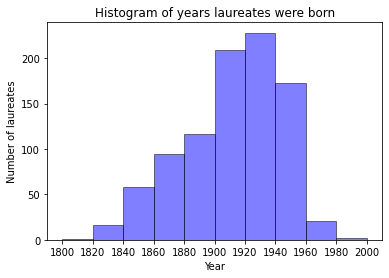

In [15]:
# Create a histogram of birthyears of all laureates who are persons (have a birthDate)
from datetime import datetime
# Initiate a list of years
years = []
# Loop all laureates
for laureate in json['laureates']:
    # If the is a birthdate
    if 'birth' in laureate:
        # Get the birthdate
        birthdate = laureate['birth']['date']
        # The API returns 00 as month and day if only year is known
        # Make it a string that datetime accepts
        birthdate = birthdate.replace('00-00', '01-01') 
        # Make it a datetime
        birthdatetime = datetime.strptime(birthdate, "%Y-%m-%d")
        # Append the year to the list of years
        years.append(birthdatetime.year)
import matplotlib.pyplot as plt
%matplotlib inline
# Define the bars in the histogram
bin_edges = [1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000]
plt.hist(years,
         bins=bin_edges,
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5)
plt.xlabel('Year')
plt.xticks([1800,1820,1840,1860,1880,1900,1920,1940,1960,1980,2000])
plt.ylabel('Number of laureates')
plt.title('Histogram of years laureates were born')
plt.show()